In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/gdrive/MyDrive/redes_neurais_tf_arvores/class' 

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
          img = cv2.imread(image_path)
          tip = imghdr.what(image_path)
          if tip not in image_exts: 
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
        except Exception as e: 
          print('Issue with image {}'.format(image_path))
          #os.remove(image_path)

arvores
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/Wald-us-veeterzy-1280x720-1-1024x576-2.jpg.webp
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/vector9.svg
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/MELHORES-ARVORES-PARA-REFLORESTAMENTO-COMERCIAL.jpg
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/vector.svg
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/vector13.svg
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/20210920-xarvores-para-sombra-jpeg-pagespeed-ic-6v5vghw5lj.jpg
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/vector4.svg
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/vector5.svg
Image not in ext list /content/gdrive/MyDrive/redes_neurais_tf_arvores/class/arvores/C3A1

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 313 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

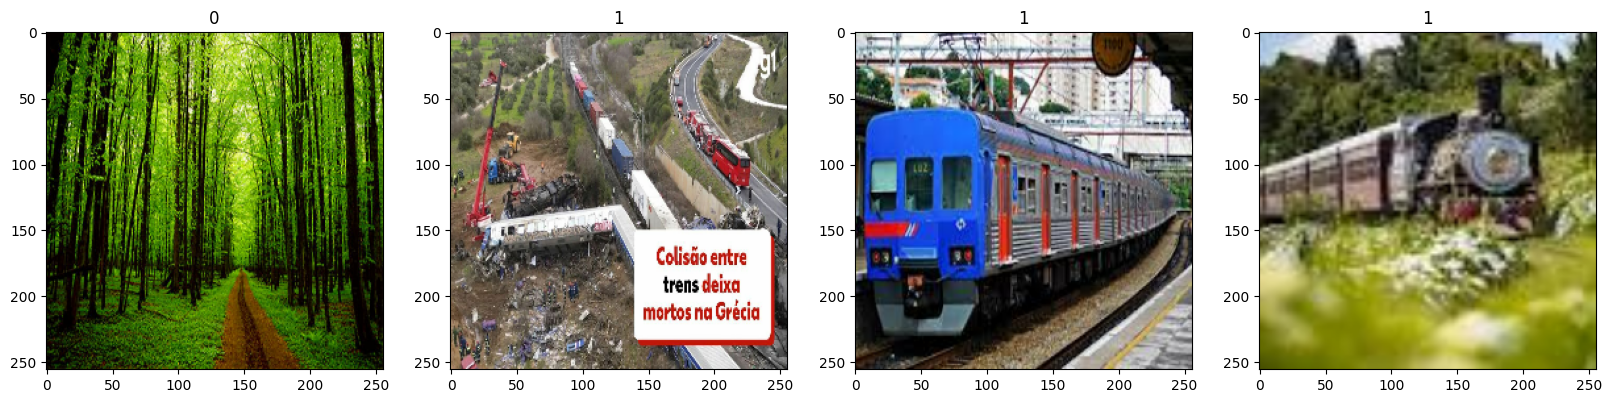

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.15294118, 0.43529412, 0.8352941 ],
          [0.15294118, 0.43529412, 0.8352941 ],
          [0.15294118, 0.43529412, 0.8352941 ],
          ...,
          [0.16078432, 0.4117647 , 0.8039216 ],
          [0.16078432, 0.4117647 , 0.8039216 ],
          [0.16078432, 0.4117647 , 0.8039216 ]],
 
         [[0.15294118, 0.43529412, 0.8352941 ],
          [0.15294118, 0.43529412, 0.8352941 ],
          [0.15294118, 0.43529412, 0.8352941 ],
          ...,
          [0.16268383, 0.41366422, 0.80582106],
          [0.16268383, 0.41366422, 0.80582106],
          [0.16268383, 0.41366422, 0.80582106]],
 
         [[0.15349264, 0.43584558, 0.8358456 ],
          [0.15349264, 0.43584558, 0.8358456 ],
          [0.15349264, 0.43584558, 0.8358456 ],
          ...,
          [0.16415441, 0.41568628, 0.80784315],
          [0.16415441, 0.41568628, 0.80784315],
          [0.16415441, 0.41568628, 0.80784315]],
 
         ...,
 
         [[0.31875   , 0.4403186 , 0.12659314],
          [0.31875

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 28s 3s/step - loss: 1.0404 - accuracy: 0.5357 - val_loss: 0.7151 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 25s 3s/step - loss: 0.6905 - accuracy: 0.5045 - val_loss: 0.5737 - val_accuracy: 0.9219
Epoch 3/20
7/7 [==============================] - 24s 3s/step - loss: 0.6348 - accuracy: 0.6562 - val_loss: 0.5639 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 23s 3s/step - loss: 0.5074 - accuracy: 0.8125 - val_loss: 0.4367 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 23s 3s/step - loss: 0.3658 - accuracy: 0.8125 - val_loss: 0.3092 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 24s 3s/step - loss: 0.3085 - accuracy: 0.8705 - val_loss: 0.2517 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 25s 3s/step - loss: 0.2739 - accuracy: 0.8839 - val_loss: 0.3811 - val_accuracy: 0.8594
Epoch 8/20
7/7 [==================

# 8. Plot Performance

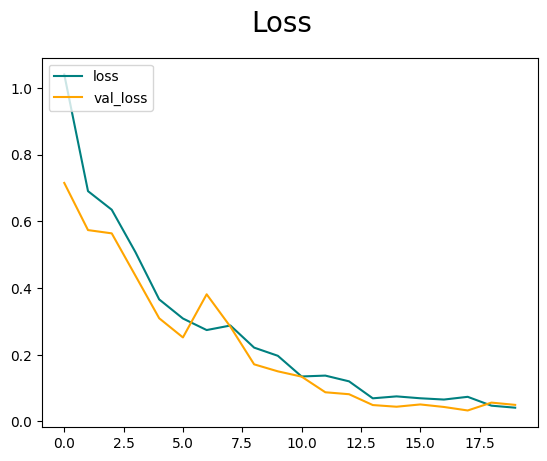

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

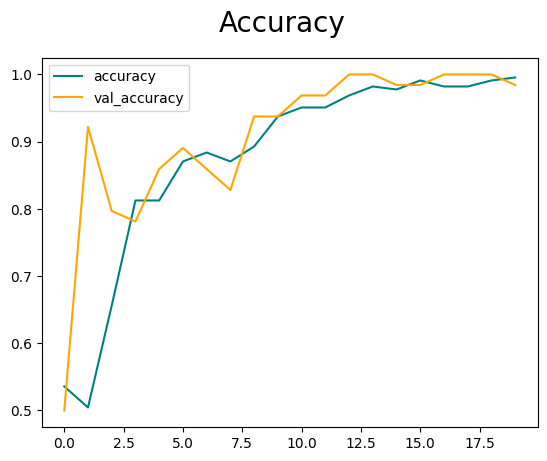

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 867ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

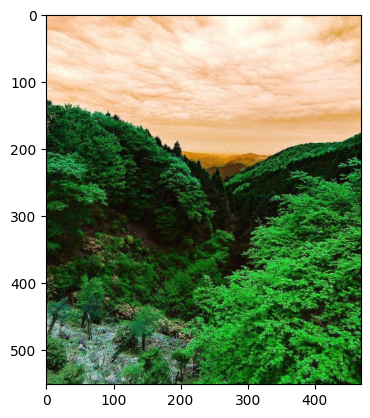

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/redes_neurais_tf_arvores/arvore2.png')
plt.imshow(img)
plt.show()

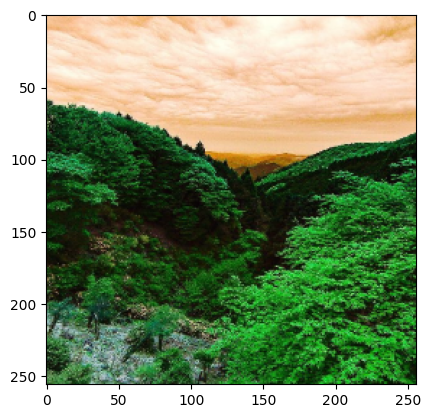

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


In [ ]:
yhat

array([[0.01350737]], dtype=float32)

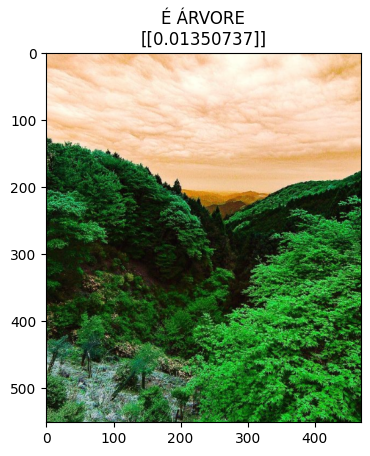

In [ ]:
if yhat > 0.5: 
    #print(f'É Trem Bão')
    plt.imshow(img)
    plt.title("É TREEEEEM\n"+str(yhat))
    plt.show()
else:
    plt.imshow(img)
    plt.title("É ÁRVORE\n"+str(yhat))
    plt.show()

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('/content/gdrive/MyDrive/redes_neurais_tf_arvores/modelo/minha_rede.h5')

In [ ]:
new_model = load_model('/content/gdrive/MyDrive/redes_neurais_tf_arvores/')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)